In [29]:
import numpy as np
import pandas as pd 
import random
from frites import set_mpl_style
import scipy.stats as stats
import matplotlib.pyplot as plt
set_mpl_style()

In [16]:
class BetaModel():
    def __init__(self,v_target,leak_factor=1):             
                
        self.a = 1  # the number of times this action returned a win       
        self.b = 1  # the number of times this action returned a loss
        self.n=0 # number of trials 
        self.omega=leak_factor
        self.vt=v_target #is the absolute value of the target velocity
        # pass the true probablity of the outcome|action taken              
    
    def outcome(self,q):        
        #return the boolean if 1 means that the eye and target have the same direction otherwwise the eye anticpates in
        #the wrong direction
        return stats.bernoulli.rvs(q) 
                    
    def update(self,reward):
        """ 
        reward here is the direction of the eye: 1 if it is the same as the target's direction otherwise 0
        
        """
        self.n += 1    
        
        if reward==1:
            self.a += 1
        
        else:
            self.b += 1
        
        self.a*=self.omega
        self.b*=self.omega
        
    def reset(self):
        self.n=0
        self.a=1
        self.b=1

    def sample(self):
         #return a value sampled from the beta distribution 
        return np.random.beta(self.a,self.b)
        #return np.mean(np.random.beta(self.a,self.b,10))

    def velocity(self):
        p=self.a/(self.a+self.b)
        return 0.2*self.vt*1/2*np.log((p)/(1-p))
        
   

In [17]:
stats.bernoulli.rvs(0.5)

1

In [47]:
random.randrange(39, 60)


59

In [48]:
v_target=15
agent=BetaModel(v_target)
mu=[]
V=[]
V_lin=[]
VV_lin=[]
O=[]
VVV=[]
VVV_lin=[]
OOO=[]
MU=[]
#Probability of the target going right 

P=[0.7,.9,1]
V_THEOS=[]
for p in P:
    switch=random.randrange(40, 60)
    for i in range(150):
        if i+1<switch:
            o=agent.outcome(0.5)
        else: 
            o=agent.outcome(p)
        O.append(o)
        V.append(agent.velocity())
        agent.update(o)
        mu.append(agent.a/(agent.a+agent.b))
        V_lin.append(0.2*v_target*(2*mu[-1]-1))
    VVV.append(V)
    VV_lin.append(V_lin)
    VVV_lin.append(0.2*v_target*(2*mu[-1]-1))
    OOO.append(O)
    MU.append(mu)
    
    print("The estimated probability of the target going right estimated by the agent is:",agent.a/(agent.a+agent.b))
    print("The antipatory velocity of the agent is ", V[-1])
    if p !=1:
        v_theo=0.2*v_target*1/2*np.log((p)/(1-p)) 
    else :v_theo=v_target/2
    V_THEOS.append(v_theo)
    print("The optimal anticpatory theorical velocitiy is " ,v_theo,'\n')
    mu=[]
    V=[]
    O=[]
    V_lin=[]
    agent.reset()
    

The estimated probability of the target going right estimated by the agent is: 0.6710526315789473
The antipatory velocity of the agent is  1.0546462671196697
The optimal anticpatory theorical velocitiy is  1.2709467905808052 

The estimated probability of the target going right estimated by the agent is: 0.7828947368421053
The antipatory velocity of the agent is  1.9112655944987766
The optimal anticpatory theorical velocitiy is  3.295836866004329 

The estimated probability of the target going right estimated by the agent is: 0.8223684210526315
The antipatory velocity of the agent is  2.2866670494010615
The optimal anticpatory theorical velocitiy is  7.5 



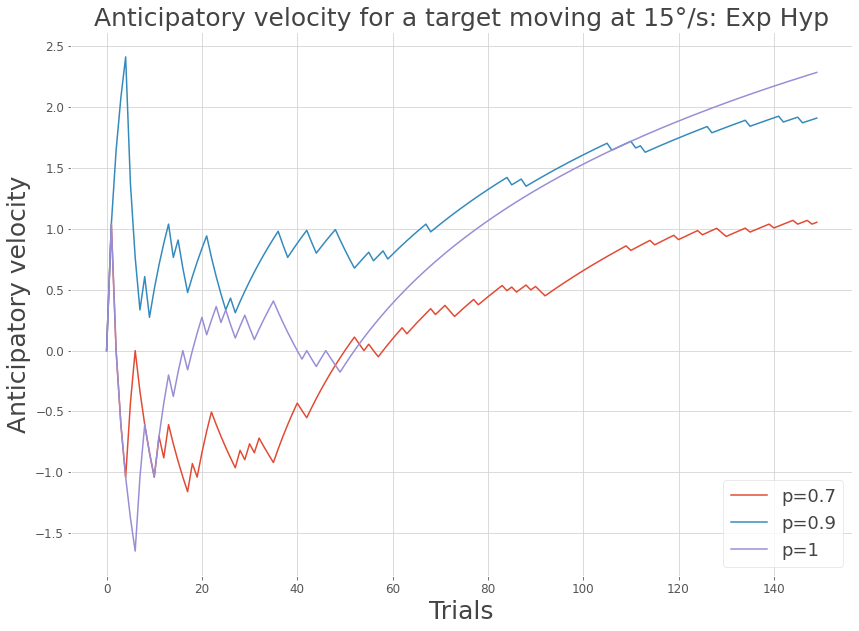

In [49]:
for v,p in zip(VVV,P):
    plt.plot(v,label=f'p={p}')
plt.xlabel("Trials",fontsize=25)
plt.ylabel("Anticipatory velocity",fontsize=25)
plt.title("Anticipatory velocity for a target moving at 15°/s: Exp Hyp",fontsize=25)
plt.legend()
plt.savefig("av_exp")

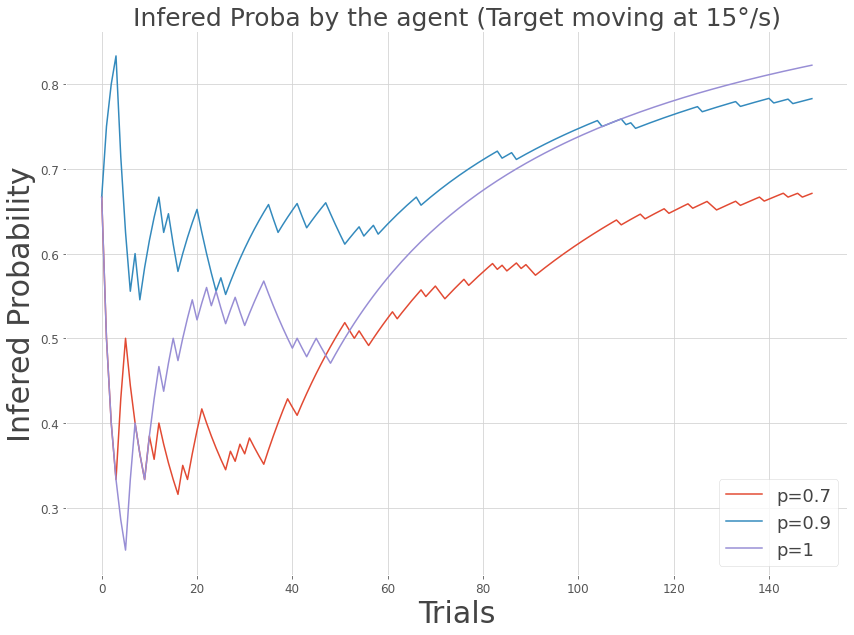

In [50]:
for m,p in zip(MU,P):
    plt.plot(m,label=f'p={p}')
plt.xlabel("Trials",fontsize=30)
plt.ylabel("Infered Probability",fontsize=30)
plt.title("Infered Proba by the agent (Target moving at 15°/s)",fontsize=25)
plt.legend()

In [51]:
ERRS=[]
for O,V in zip(OOO,VVV):
    Err=np.array(O)*np.exp(1-np.array(V)/v_target) + (1-np.array(O))*np.exp(1+np.array(V)/v_target)
    ERRS.append(Err)

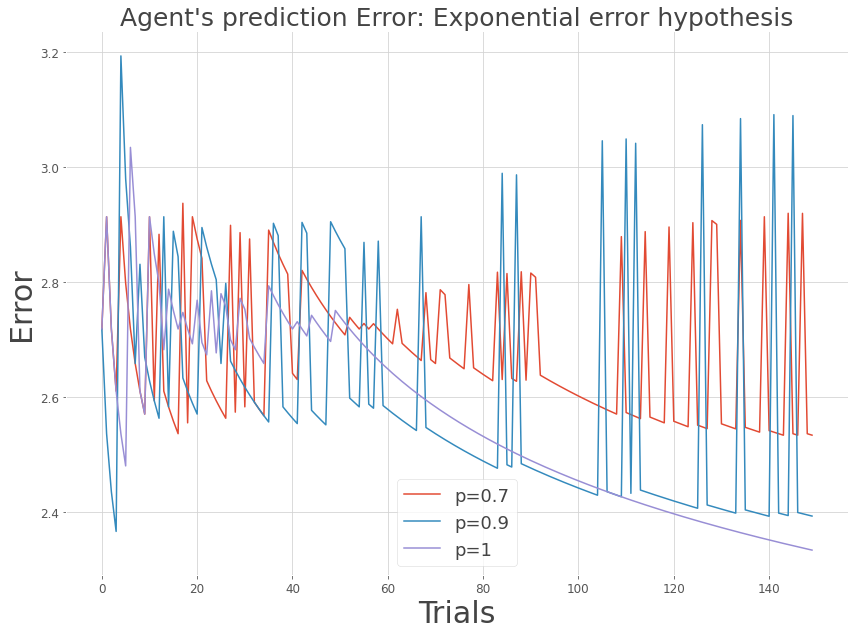

In [52]:
for e,p in zip(ERRS,P):
    plt.plot(e,label=f'p={p}')

plt.xlabel("Trials",fontsize=30)
plt.ylabel("Error",fontsize=30)
plt.title("Agent's prediction Error: Exponential error hypothesis",fontsize=25)
plt.legend()
plt.savefig("err_exp")

In [53]:
ERRS_lin=[]
for O,V in zip(OOO,VVV_lin):
    Err=np.array(O)*(1-np.array(V)/v_target)**2 + (1-np.array(O))*(1+np.array(V)/v_target)**2
    ERRS_lin.append(Err)

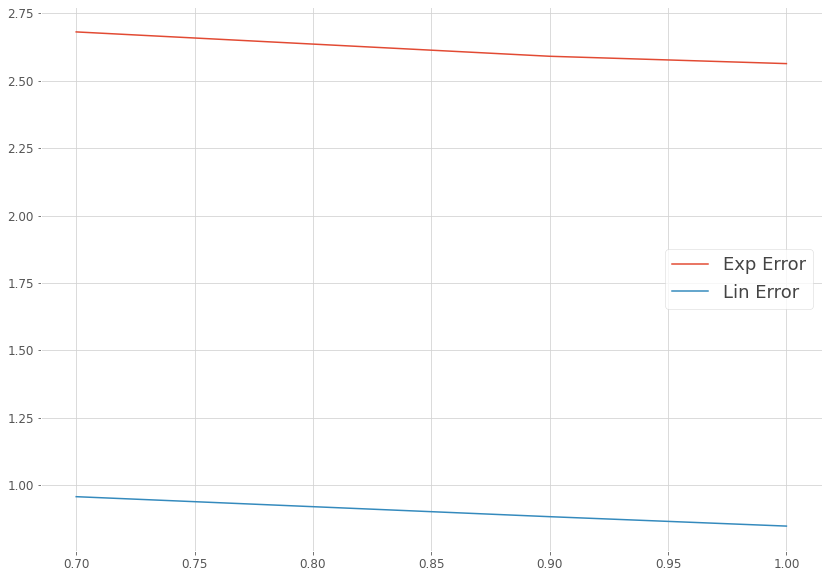

In [54]:
plt.plot(P,np.mean(ERRS,axis=1),label="Exp Error")
plt.plot(P,np.mean(ERRS_lin,axis=1),label="Lin Error")
plt.legend()

In [55]:
for e,v_th,p in zip(ERRS,V_THEOS,P):
    theo_Err=np.exp(1)*(np.exp(v_th/v_target)-2*p*np.sinh(v_th/v_target))
    print(f'Empirical error of the agent is with {p}:', np.mean(e))
    print(f"Theoritical error of the agent is with {p}:",theo_Err,'\n')

Empirical error of the agent is with 0.7: 2.681294519638628
Theoritical error of the agent is with 0.7: 2.6358070780620007 

Empirical error of the agent is with 0.9: 2.590938463368087
Theoritical error of the agent is with 0.9: 2.3024947978841097 

Empirical error of the agent is with 1: 2.5637083662459634
Theoritical error of the agent is with 1: 1.648721270700128 



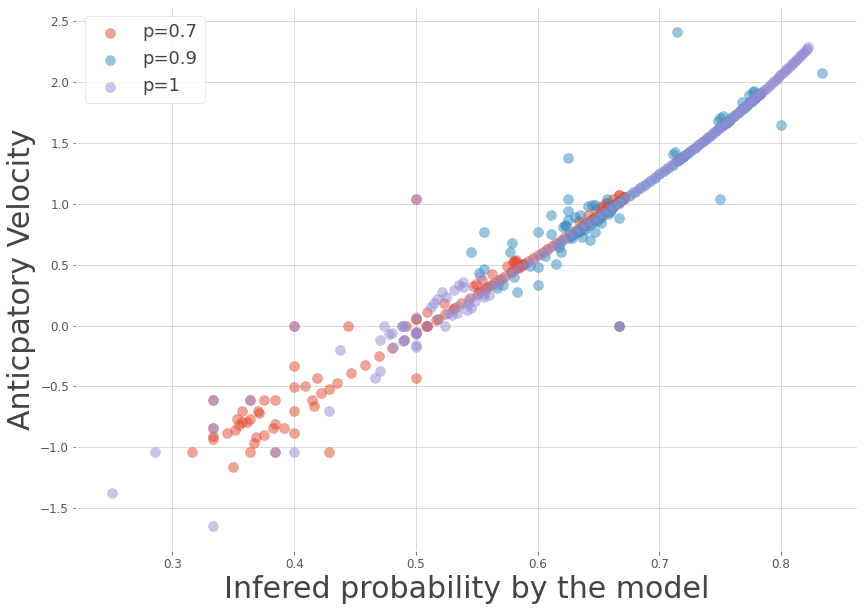

In [56]:
for m,v,p in zip(MU,VVV,P):
    plt.scatter(m,v,s=100,label=f'p={p}',alpha=0.5)
plt.xlabel("Infered probability by the model",fontsize=30)
plt.ylabel("Anticpatory Velocity",fontsize=30)
plt.legend()
plt.savefig("avelos")

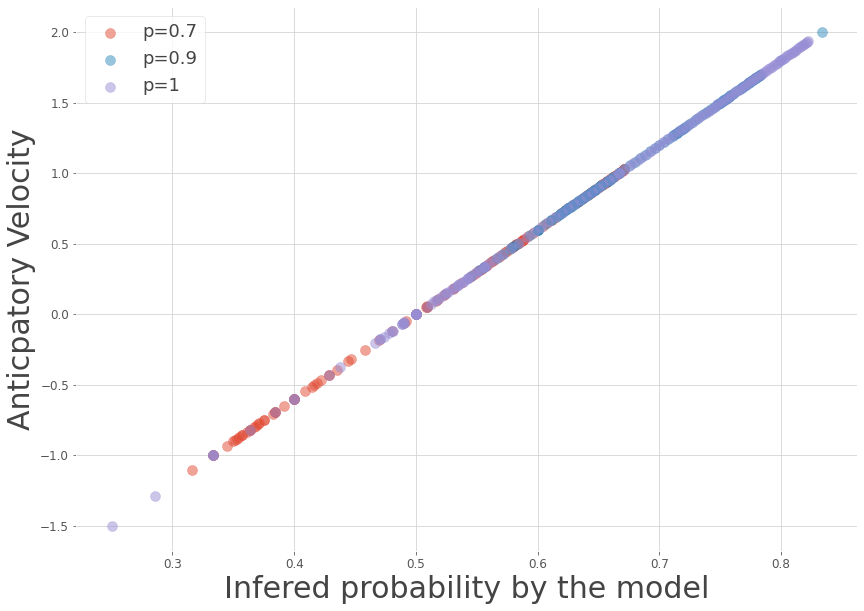

In [57]:
for m,v,p in zip(MU,VV_lin,P):
    plt.scatter(m,v,s=100,label=f'p={p}',alpha=0.5)
plt.xlabel("Infered probability by the model",fontsize=30)
plt.ylabel("Anticpatory Velocity",fontsize=30)
plt.legend()
plt.savefig("aveloslin")

In [59]:
len(VV_lin[-1])

150

In [60]:
len(MU[0])

150

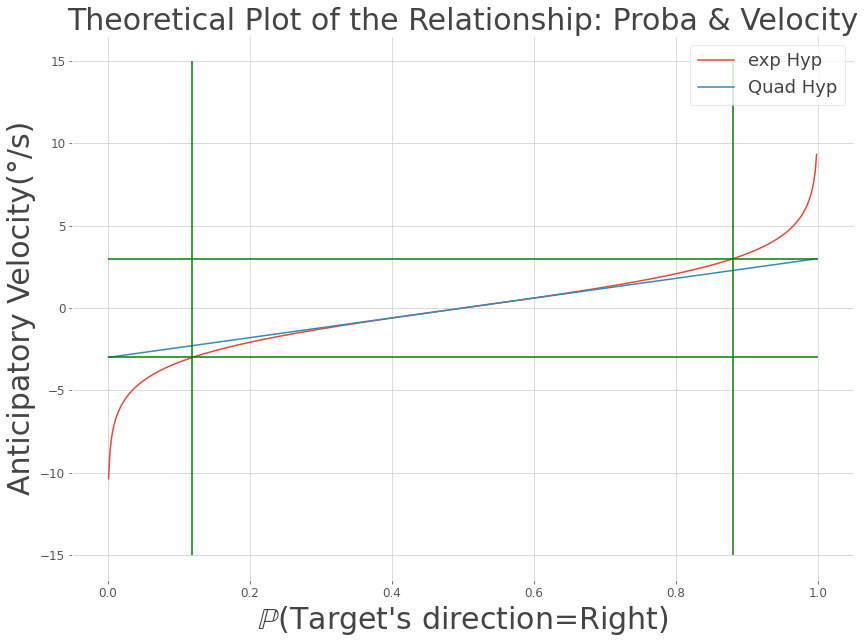

In [61]:
#Theorical plot
k=0.2
P=np.linspace(0.001,1,500,endpoint=False)
VV=k*v_target*1/2*np.log(P/(1-P))
plt.plot(P,VV,label="exp Hyp")
VV=k*v_target*(2*P-1)
plt.plot(P,VV,label="Quad Hyp")
plt.hlines(k*-v_target,0,1,colors="green")
plt.hlines(k*v_target,0,1,colors="green")
plt.vlines(1/(np.exp(2)+1),-15,15,colors="green")
plt.vlines(1/(np.exp(-2)+1),-15,15,colors="green")
plt.xlabel("$\mathbb{P}$(Target's direction=Right)",fontsize=30)
plt.ylabel("Anticipatory Velocity(°/s)",fontsize=30)
plt.legend()
plt.title("Theoretical Plot of the Relationship: Proba & Velocity",fontsize=30)
plt.savefig("theoplot")

In [62]:
1/(np.exp(2)+1)

0.11920292202211755

In [63]:
1/(np.exp(-2)+1)

0.8807970779778823

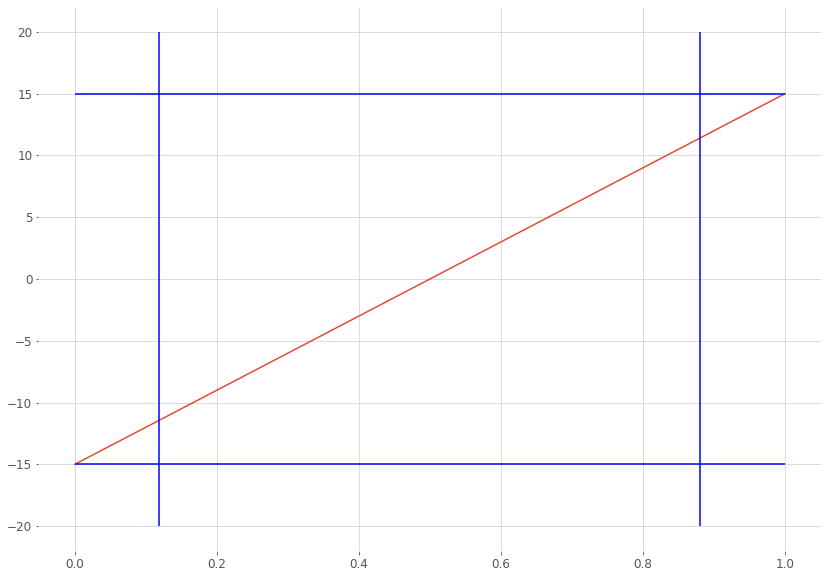

In [64]:
#Theoritical plot
P=np.linspace(0.0,1,100)
VV=v_target*(2*P-1)
plt.plot(P,VV)
plt.hlines(-v_target,0,1,colors="blue")
plt.hlines(v_target,0,1,colors="blue")
plt.vlines(1/(np.exp(2)+1),-20,20,colors="blue")
plt.vlines(1/(np.exp(-2)+1),-20,20,colors="blue")